### 01 셀트리온 종가 크롤링

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import requests
from datetime import datetime
from matplotlib import dates as mdates
from bs4 import BeautifulSoup as bs

In [2]:
url = 'https://finance.naver.com/item/sise_day.nhn?code=068270&page=1'

In [3]:
headers = {'user-agent' : 'Mozilla/5.0 (Macintosh; Intel Mac OS X 10_15_7) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/88.0.4324.96 Safari/537.36'}
response = requests.get(url, headers = headers)

In [4]:
response.text

'\n<html lang="ko">\n<head>\n<meta http-equiv="Content-Type" content="text/html; charset=euc-kr">\n<title>네이버페이 증권</title>\n\n<link rel="stylesheet" type="text/css" href="https://ssl.pstatic.net/imgstock/static.pc/20250304174726/css/newstock.css">\n<link rel="stylesheet" type="text/css" href="https://ssl.pstatic.net/imgstock/static.pc/20250304174726/css/common.css">\n<link rel="stylesheet" type="text/css" href="https://ssl.pstatic.net/imgstock/static.pc/20250304174726/css/finance_header.css">\n<link rel="stylesheet" type="text/css" href="https://ssl.pstatic.net/imgstock/static.pc/20250304174726/css/layout.css">\n<link rel="stylesheet" type="text/css" href="https://ssl.pstatic.net/imgstock/static.pc/20250304174726/css/main.css">\n<link rel="stylesheet" type="text/css" href="https://ssl.pstatic.net/imgstock/static.pc/20250304174726/css/newstock2.css">\n<link rel="stylesheet" type="text/css" href="https://ssl.pstatic.net/imgstock/static.pc/20250304174726/css/newstock3.css">\n<link rel="st

In [5]:
html = bs(response.text, 'html.parser')
html_table = html.select("table")
table = pd.read_html(str(html_table))
print('피싱된 데이터 갯수', len(table))

피싱된 데이터 갯수 2


In [6]:
table[0]

,날짜,종가,전일비,시가,고가,저가,거래량
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2025.03.06,187600.0,"상승 2,900",185500.0,188600.0,182200.0,353767.0
2,2025.03.05,184700.0,"상승 1,200",183600.0,187200.0,183600.0,517242.0
3,2025.03.04,183500.0,하락 500,184000.0,192900.0,183100.0,1023169.0
4,2025.02.28,184000.0,"상승 1,300",181100.0,186900.0,181000.0,1175987.0
5,2025.02.27,182700.0,"하락 6,600",187600.0,189000.0,181500.0,926161.0
6,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,2025.02.26,189300.0,"상승 15,200",176200.0,190900.0,176000.0,2169289.0


In [7]:
table[1]

,0,1,2,3,4,5,6,7,8,9,10,11
0,1,2,3,4,5,6,7,8,9,10,다음,맨뒤


In [8]:
table[0].dropna()

,날짜,종가,전일비,시가,고가,저가,거래량
1,2025.03.06,187600.0,"상승 2,900",185500.0,188600.0,182200.0,353767.0
2,2025.03.05,184700.0,"상승 1,200",183600.0,187200.0,183600.0,517242.0
3,2025.03.04,183500.0,하락 500,184000.0,192900.0,183100.0,1023169.0
4,2025.02.28,184000.0,"상승 1,300",181100.0,186900.0,181000.0,1175987.0
5,2025.02.27,182700.0,"하락 6,600",187600.0,189000.0,181500.0,926161.0
9,2025.02.26,189300.0,"상승 15,200",176200.0,190900.0,176000.0,2169289.0
10,2025.02.25,174100.0,"하락 3,900",177200.0,179200.0,174000.0,623431.0
11,2025.02.24,178000.0,하락 200,178300.0,178700.0,176500.0,308620.0
12,2025.02.21,178200.0,"하락 2,200",180400.0,180700.0,178200.0,383460.0
13,2025.02.20,180400.0,하락 200,180100.0,181400.0,179000.0,426244.0


In [9]:
# 1페이지 부터 99페이지까지 반복

df = pd.DataFrame()
sise_url = 'https://finance.naver.com/item/sise_day.nhn?code=068270' 
for page in range(1, 100):
    page_url = '{}&page = {}'.format(sise_url, page)
    print(page_url)

    # 위에서 했던 일련의 과정들을 반복
    respone = requests.get(page_url, headers = headers)
    html = bs(response.text, 'html.parser')
    html_table = html.select("table")
    table = pd.read_html(str(html_table))

    # 현재 얻은 데이터프레임을 기존 데이터프레임에 누적
    df = df.append(table[0].dropna())

https://finance.naver.com/item/sise_day.nhn?code=068270&page = 1
https://finance.naver.com/item/sise_day.nhn?code=068270&page = 2
https://finance.naver.com/item/sise_day.nhn?code=068270&page = 3
https://finance.naver.com/item/sise_day.nhn?code=068270&page = 4
https://finance.naver.com/item/sise_day.nhn?code=068270&page = 5
https://finance.naver.com/item/sise_day.nhn?code=068270&page = 6
https://finance.naver.com/item/sise_day.nhn?code=068270&page = 7
https://finance.naver.com/item/sise_day.nhn?code=068270&page = 8
https://finance.naver.com/item/sise_day.nhn?code=068270&page = 9
https://finance.naver.com/item/sise_day.nhn?code=068270&page = 10
https://finance.naver.com/item/sise_day.nhn?code=068270&page = 11
https://finance.naver.com/item/sise_day.nhn?code=068270&page = 12
https://finance.naver.com/item/sise_day.nhn?code=068270&page = 13
https://finance.naver.com/item/sise_day.nhn?code=068270&page = 14
https://finance.naver.com/item/sise_day.nhn?code=068270&page = 15
https://finance.nav

In [10]:
df

,날짜,종가,전일비,시가,고가,저가,거래량
1,2025.03.06,187600.0,"상승 2,900",185500.0,188600.0,182200.0,353767.0
2,2025.03.05,184700.0,"상승 1,200",183600.0,187200.0,183600.0,517242.0
3,2025.03.04,183500.0,하락 500,184000.0,192900.0,183100.0,1023169.0
4,2025.02.28,184000.0,"상승 1,300",181100.0,186900.0,181000.0,1175987.0
5,2025.02.27,182700.0,"하락 6,600",187600.0,189000.0,181500.0,926161.0
...,...,...,...,...,...,...,...
9,2025.02.26,189300.0,"상승 15,200",176200.0,190900.0,176000.0,2169289.0
10,2025.02.25,174100.0,"하락 3,900",177200.0,179200.0,174000.0,623431.0
11,2025.02.24,178000.0,하락 200,178300.0,178700.0,176500.0,308620.0
12,2025.02.21,178200.0,"하락 2,200",180400.0,180700.0,178200.0,383460.0


In [11]:
df = df.dropna()
df = df.iloc[0:30]
df = df.sort_values(by = "날짜")
df

,날짜,종가,전일비,시가,고가,저가,거래량
13,2025.02.20,180400.0,하락 200,180100.0,181400.0,179000.0,426244.0
13,2025.02.20,180400.0,하락 200,180100.0,181400.0,179000.0,426244.0
13,2025.02.20,180400.0,하락 200,180100.0,181400.0,179000.0,426244.0
12,2025.02.21,178200.0,"하락 2,200",180400.0,180700.0,178200.0,383460.0
12,2025.02.21,178200.0,"하락 2,200",180400.0,180700.0,178200.0,383460.0
12,2025.02.21,178200.0,"하락 2,200",180400.0,180700.0,178200.0,383460.0
11,2025.02.24,178000.0,하락 200,178300.0,178700.0,176500.0,308620.0
11,2025.02.24,178000.0,하락 200,178300.0,178700.0,176500.0,308620.0
11,2025.02.24,178000.0,하락 200,178300.0,178700.0,176500.0,308620.0
10,2025.02.25,174100.0,"하락 3,900",177200.0,179200.0,174000.0,623431.0


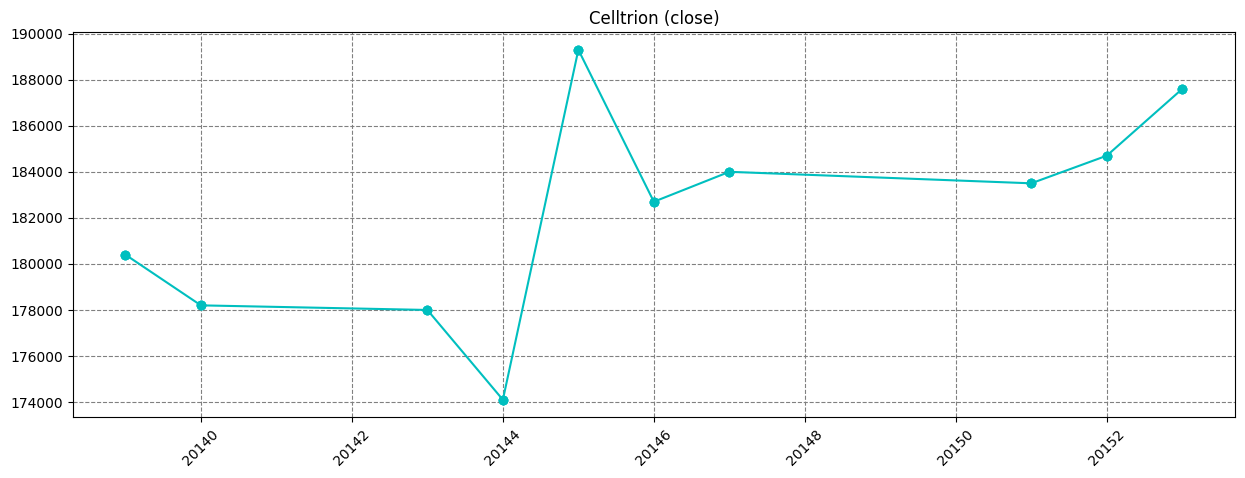

In [16]:
plt.figure(figsize = (15, 5))
plt.title('Celltrion (close)')
plt.xticks(rotation = 45)
plt.plot(df["날짜"], df["종가"], 'co-')
plt.grid(color = 'gray', linestyle = '--')
plt.show()

### 02 캔들차트

In [ ]:
# 구버전 설치
# !pip install mpl_finance

In [19]:
from mpl_finance import candlestick_ohlc

df = df.sort_values(by = '날짜')

for idx in range(0, len(df)):
    # 날짜열을 datetime으로 변환
    dt = datetime.strptime(df['날짜'].values[idx], '%Y.%m.%d').date()

    # datetime 형을 float 형으로 변환
    df['날짜'].values[idx] = mdates.date2num(dt)

# candlestick_ohlc() 에서 요구하는 형식으로 변경
ohlc = df[['날짜', '시가', '고가', '저가', '종가']]

plt.figure(figsize = (9, 6))
ax = plt.subplot(1, 1, 1)
plt.title('Celltrion (mpl_finance candle stick)')

# candlestick_ohlc 함수를 이용하여 캔들 차트를 그린다.
candlestick_ohlc(ax, ohlc.values, width = 0.7, colorup = 'red', colordown = 'blue')

# x축의 레이블이 숫자, %Y.%m.%d 형식 문자열로 변환하여 표시
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y.%m.%d'))
plt.xticks(rotation = 45)
plt.grid(color = 'gray', linestyle = '--')
plt.show()

TypeError: strptime() argument 1 must be str, not numpy.float64